**LetsGrowMore Virtual Internship Program**

Data Science Internship - LGMVIP JULY 2022


---


**By: Arunjyoti Mukherjee**

Linkedin: https://www.linkedin.com/in/arunjyoti-mukherjee-903823178/

GitHub:  https://github.com/programaccount


---


**Advanced Level Task1:**

**Develop A Neural Network That Can Read Handwriting.**

**Dataset:** https://en.wikipedia.org/wiki/MNIST_database

**Importing the required libraries and loading the MNSIT dataset from keras:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

In [ ]:
#example of loading the mnist dataset
from keras.datasets import mnist

**Loading the dataset**

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Summarizing the loaded dataset**

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


**PRESUMPTION:**

We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

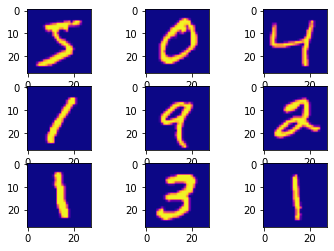

In [ ]:
#Plotting the first few images
for i in range(9):
#Defining the subplot
  plt.subplot(330 + 1 + i)
#Plotting the raw pixel data
  plt.imshow(X_train[i], cmap=plt.get_cmap('plasma'))

**PRESUMPTION:**

A plot of the first nine images in the dataset is also created showing the natural handwritten nature of the images to be classified.

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

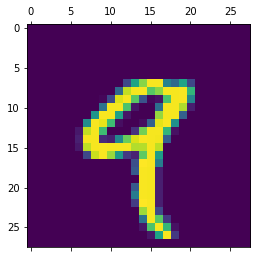

In [ ]:
plt.matshow(X_train[4])
plt.show()

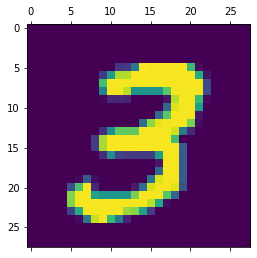

In [ ]:
plt.matshow(X_train[7])
plt.show()

In [ ]:
y_train[4]

9

**PRESUMPTION:**

As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features by dividing 255.

**Data cleaning, normalisation and cleaning:**

**Preparing the Pixel data:**

Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as in the slower than expected training of the model.
We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Model fitting:**

We proceed by fitting several simple neural network models using Keras (with TensorFlow as our backend) and collect their accuracy. The model that performs the best on the validation set will be used as the model of choice for the competition.

**Model 1: Very simple neural network with no hidden layers -**

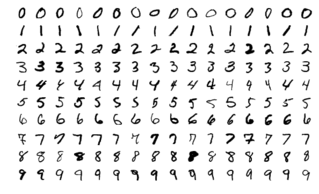

**Sample images from MNIST test dataset**

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4650 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9257


In [ ]:
model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9278


[0.26691871881484985, 0.9277999997138977]

**Accuracy = 92.78%**

In [ ]:
y_predicted = model1.predict(X_test_flattened)
y_predicted[3]

array([9.9934328e-01, 1.9185087e-08, 8.7701112e-02, 1.0532707e-02,
       5.2263473e-05, 9.9024117e-02, 1.2707636e-01, 2.3893416e-02,
       3.8863510e-02, 1.2455642e-02], dtype=float32)

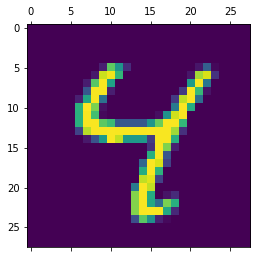

In [ ]:
plt.matshow(X_test[6])
plt.show()

**PRESUMPTION:**

np.argmax finds a maximum element from an array and returns the index of it.

In [ ]:
np.argmax(y_predicted[6])

4

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    7,    7,    3,    3,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    8,  930,   17,    8,    3,   11,    9,   38,    4],
       [   1,    0,   20,  931,    0,   20,    2,   11,   18,    7],
       [   1,    1,    6,    1,  909,    0,   11,    4,   10,   39],
       [   7,    3,    3,   31,    7,  784,   12,    5,   34,    6],
       [   8,    3,    7,    1,    7,   16,  911,    2,    3,    0],
       [   1,    7,   23,    9,    6,    0,    0,  945,    3,   34],
       [   5,    9,    7,   27,    9,   22,    9,    7,  873,    6],
       [   9,    7,    2,   12,   21,    7,    0,   19,   11,  921]],
      dtype=int32)>

**Heatmap**

Text(69.0, 0.5, 'Truth')

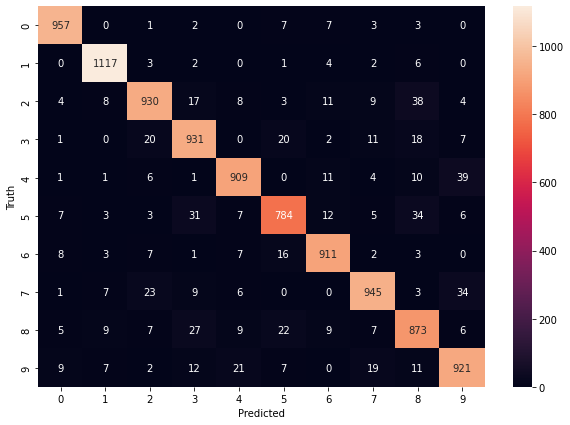

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**PRESUMPTION:**

We saw that without using hidden layers, we got an accuracy of 92%.

**Model 2 : Using simple neural network with 1 layer -**

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2780 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1244 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0858 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [ ]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9767


[0.08505946397781372, 0.9767000079154968]

**PRESUMPTION:**

Here, we got an accuracy of 97.67% in the validation test set

**Model 3 : Using simple neural network with 3 layer -**

In [ ]:
model3 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2091 - accuracy: 0.9365
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0935 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0675 - accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0262 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [ ]:
model3.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9810


[0.07561513781547546, 0.9810000061988831]

**ACCURACY = 98.10%**

Text(69.0, 0.5, 'Truth')

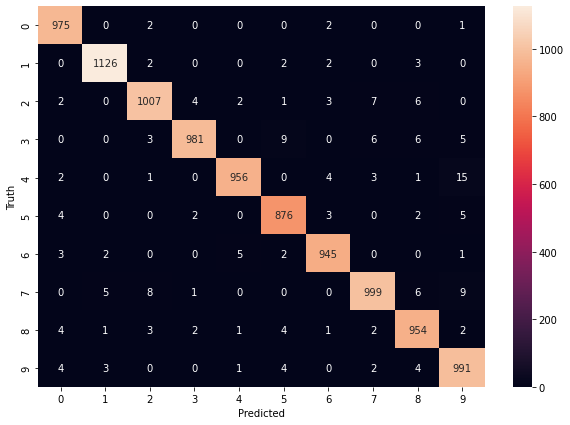

In [ ]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**PRESUMPTION:**

Here, we got an accuracy of 98.10% in the validation test set.